# 42577 Introduction to Business Analytics Final Project - Airbnb

#### <pre> Yang Su s221421    Robert Pham S221814    Wataru Kunimi S221747 </pre>


## 1 Introduction + Data analysis and visualization

### 1.1 Introduction

Airbnb is an online marketplace focused on short term housing rentals. In this report, we will investigate and analyze data from Airbnb rentals to investigate any pricing or location trends.

Specifically, we will first analyze the housing data from Copenhagen to try and classify/predict the listing prices 

Next, we will investigate the following research questions:
- What are the main factors affecting the price of a rental? 
- Can a model trained on data from one city perform well on another city?
- Can data from different cities be pooled to generate better predictions?

Lastly, we will summarize our findings and answer the research questions using the insight gained

### 1.2 Data analysis

We will be using Copenhagen Data

In [1]:
#libraries used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, plot_confusion_matrix, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb


In [2]:
# Load the Airbnb data using the Pandas library
df = pd.read_csv('listings_CPH.csv')

# lets see what the data contains
df.head().T

,0,1,2,3,4
id,6983,26057,26473,29118,31094
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse"
host_id,16774,109777,112210,125230,129976
host_name,Simon,Kari,Julia,Nana,Ebbe
neighbourhood_group,NaN,NaN,NaN,NaN,NaN
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954


In [3]:
df.shape

(13815, 18)

In [4]:
# how many NaN data are included in each element
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               13815
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        1645
reviews_per_month                  1645
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13815
dtype: int64

The neighbourhood_group and license fields dont have much use since are all NaN.

In [5]:
#drop these columns
df = df.drop(['neighbourhood_group', 'license'], axis=1)

In [6]:
df.head().T

,0,1,2,3,4
id,6983,26057,26473,29118,31094
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse"
host_id,16774,109777,112210,125230,129976
host_name,Simon,Kari,Julia,Nana,Ebbe
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3


### 1.3 Visualization

Lets quickly visualize the data so we can get a better understanding 

Longatude and latitude data:

In [7]:
#assign a color to each neighbourhood
neighbourhoods = df.neighbourhood.unique()

color_map = {}

for i in range(len(neighbourhoods)):
    color_map[neighbourhoods[i]] = i

df['neighbourhood_color'] = df.neighbourhood.apply(lambda x: color_map[x])


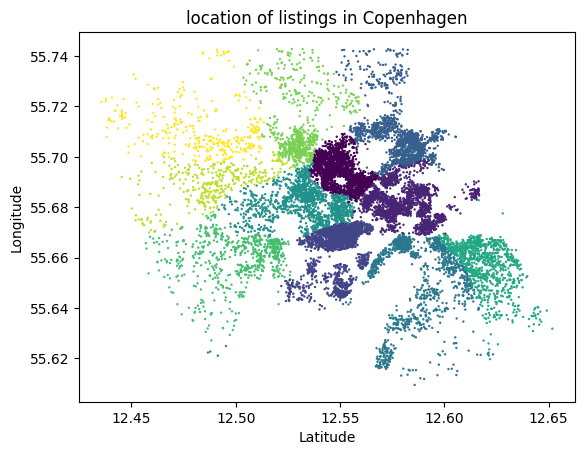

In [8]:
#plotting
plt.scatter(df.longitude, df.latitude, s=0.5, c=df.neighbourhood_color)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('location of listings in Copenhagen')
plt.show()

We see that most of the listings are concentrated near the city center.

Next, lets look at the room types

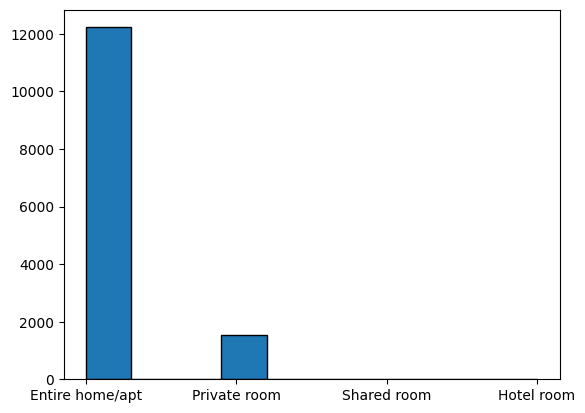

In [9]:
plt.hist(df['room_type'], edgecolor='black')
plt.show()

The majority of rentals are offered as entire homes/apartments while only a small portion are private rooms. Shared rooms and hotel rooms are very rare

In [10]:
print('number of hotel rooms listed: ' + str(len(df[df.room_type == 'Hotel room'])))
print('number of Shared rooms listed: ' + str(len(df[df.room_type == 'Shared room'])))

number of hotel rooms listed: 15
number of Shared rooms listed: 19


Lastly, lets look at the rental prices

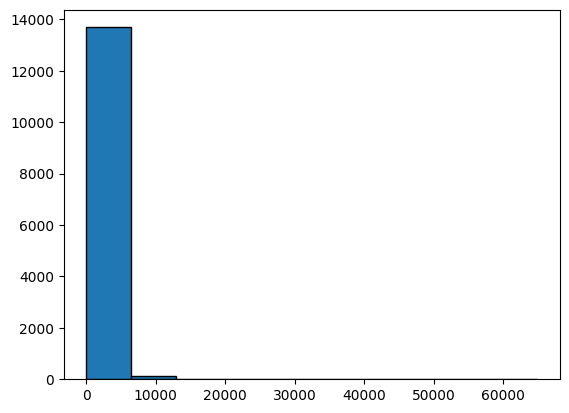

In [11]:
plt.hist(df['price'], edgecolor='black')
plt.show()

We see that the majority of prices lie between 0-15000 and there are some extremes

In [12]:
print('highest price is:' + str(max(df.price)))
print('highest price is:' + str(min(df.price)))

highest price is:64900
highest price is:0


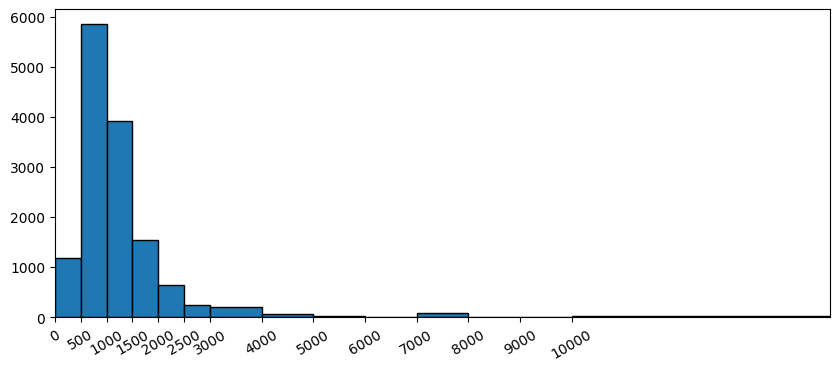

percentage of listings price less than $6000: 99.03003981179876


In [13]:
#plotting with adjusted baskets
b = [0, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 65000]

fig, ax = plt.subplots(figsize=(10, 4))
plt.hist(df['price'], bins=b, edgecolor='black')
plt.xticks(b)
b[-1] = 65000
ax.set_xticklabels(b)
plt.xlim(0, 15000)
plt.xticks(rotation=30)
plt.show()

print('percentage of listings price less than $6000: ' + str(len(df[df.price < 6000]) / len(df.price)*100))

<AxesSubplot: >

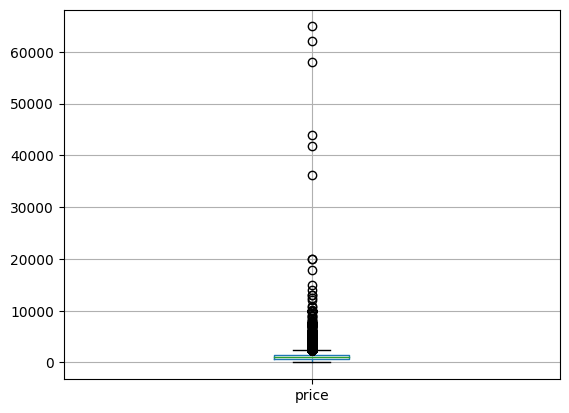

In [14]:
#boxplot
df.boxplot('price')

now we see that most prices (99%) lie between 0-$6000. The box plot also reveals that there are some extreme outliers which we need to consider.

This may be an issue later when classifying the prices. Using metrics like 'mean' to differentiate high and low prices would not be a good choice since the outliers would add a bias and increase the mean


## 2. Prediction Challenge

### 2.1 Binary Classification

We will set the threshold as the median of data. As explained previously, using the average or mean as the threshold would be biased since there are outliers.

to further prepare the data, the id, name, and host_name attributes will be dropped since we believe they have little influence in the price of the rentals. Additionally, dummies of neighbourhood and room type will be created since they are discrete categorical data. Lastly, we will standardize the non-class values such as latitude, minimum_nights, and number_of_reviews.

In [15]:
#preparing the data
data = df.copy()

threshold = data['price'].median()
target = data['price'].apply(lambda x: x>threshold).astype(int)

data = data.drop(['id', 'name', 'host_name'], axis=1)

data = data[[ 'neighbourhood', 'latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

data = pd.get_dummies(data, columns=['neighbourhood', 'room_type'], drop_first=True)
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)

col = ['latitude', 'longitude',  'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

#standardize data
for n in col:
    data[n] = (data[n] - data_mean[n]) / data_std[n]

data.head().T

,0,1,2,3,4
latitude,0.276988,0.592800,-0.215698,-0.490256,-0.662307
longitude,-0.310200,0.557561,0.525035,-0.082517,-0.075263
minimum_nights,-0.095004,-0.035832,-0.095004,0.141681,-0.095004
number_of_reviews,4.214770,1.110602,7.730995,0.149134,0.011782
calculated_host_listings_count,-0.159666,-0.159666,-0.065763,-0.159666,-0.159666
availability_365,-0.757561,1.702615,-0.302875,-0.278517,-0.757561
number_of_reviews_ltm,-0.127581,0.224099,0.136179,-0.303421,-0.303421
neighbourhood_Amager st,0.000000,0.000000,0.000000,0.000000,0.000000
neighbourhood_Bispebjerg,0.000000,0.000000,0.000000,0.000000,0.000000
neighbourhood_Brnshj-Husum,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
#transforming data into train, validation, test. trainval contains both train and validation data.
x_trainval, x_test, y_trainval, y_test = train_test_split(data, target, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, random_state=1)

#### Logistic Regression

Lets first try using logistic regression

In [17]:
lr = LogisticRegression()
lr.fit(x_trainval, y_trainval)

LogisticRegression()

accuracy score: 0.678054
F1-score: 0.678054
confusion matrix:
[[1142  597]
 [ 515 1200]]


C:\Users\Yang\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


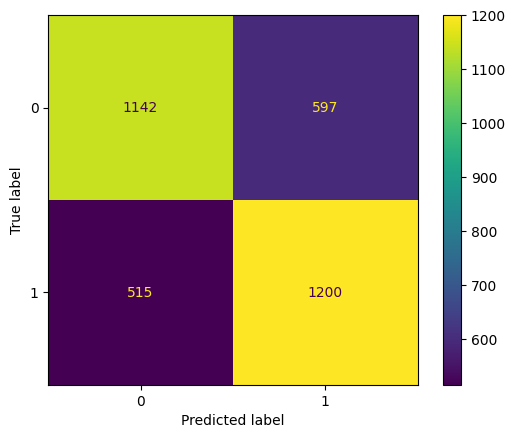

In [18]:
#lets check the accuracy
y_pred_lr = lr.predict(x_test)

print("accuracy score: %f" % accuracy_score(y_test, y_pred_lr))
print("F1-score: %f" % f1_score(y_test, y_pred_lr, average='micro'))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))

plot_confusion_matrix(lr, x_test, y_test)  
plt.show()

We see that the logistic regression model has gotten an accuracy of 67.8% and a similar F1 score of 67.8%. 

F1 score measures the mean of the precision (how many of the predicted 'true' labels are actually 'true') and recall (how many 'true' labels are labeled as 'true'). In this case, both values are similar to the overall accuracy

This F1 score exceeds the targeted score of '60%' so logistic regression is a good classifier. 

But we can do better.

#### XGBooster

Now let’s try using the XGBooster model with cross-validation and grip search

XGBooster (Extreme Gradient Boosting) is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. In addition to it, we will use cross-validation

By preparing some elements of learning rate and gamma, we can use optimal parameters to classify. We can also take advantage of the data by using cross-validation and grid search model.

In [19]:
# training data with the model of XGBooster
model = xgb.XGBClassifier()

#for parameter tuning, prepare parameters
params = { 'learning_rate': [ 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'gamma': [ 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0]}

#making cross-validation and grid search model which uses xgbooster.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params, cv=skf, scoring='f1', n_jobs=1, verbose=3)

clf.fit(x_trainval, y_trainval)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END gamma=0.0001, learning_rate=0.0001;, score=0.690 total time=   0.3s
[CV 2/5] END gamma=0.0001, learning_rate=0.0001;, score=0.685 total time=   0.3s
[CV 3/5] END gamma=0.0001, learning_rate=0.0001;, score=0.679 total time=   0.3s
[CV 4/5] END gamma=0.0001, learning_rate=0.0001;, score=0.648 total time=   0.3s
[CV 5/5] END gamma=0.0001, learning_rate=0.0001;, score=0.626 total time=   0.3s
[CV 1/5] END .gamma=0.0001, learning_rate=0.001;, score=0.693 total time=   0.3s
[CV 2/5] END .gamma=0.0001, learning_rate=0.001;, score=0.682 total time=   0.3s
[CV 3/5] END .gamma=0.0001, learning_rate=0.001;, score=0.677 total time=   0.3s
[CV 4/5] END .gamma=0.0001, learning_rate=0.001;, score=0.648 total time=   0.3s
[CV 5/5] END .gamma=0.0001, learning_rate=0.001;, score=0.679 total time=   0.3s
[CV 1/5] END ..gamma=0.0001, learning_rate=0.01;, score=0.708 total time=   0.3s
[CV 2/5] END ..gamma=0.0001, learning_rate=0.01

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3,
                                           1.0]},
             scoring='f1', verbose=3)

In [20]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
df = pd.DataFrame(data=zip(means, stds, params), columns=['mean', 'std', 'params'])

# sort std and mean lower to higher
df = df.sort_values('std', ascending=True)
df = df.sort_values('mean', ascending=False)

# show score, std, params
for index, row in df.iterrows():
    print("f1 score: %.3f +/-%.4f, params: %r" % 
          (row['mean'], row['std']*2, row['params']))

f1 score: 0.711 +/-0.0228, params: {'gamma': 0.1, 'learning_rate': 0.1}
f1 score: 0.711 +/-0.0197, params: {'gamma': 0.01, 'learning_rate': 0.1}
f1 score: 0.711 +/-0.0208, params: {'gamma': 1.0, 'learning_rate': 0.1}
f1 score: 0.710 +/-0.0214, params: {'gamma': 0.03, 'learning_rate': 0.1}
f1 score: 0.709 +/-0.0258, params: {'gamma': 0.0001, 'learning_rate': 0.1}
f1 score: 0.709 +/-0.0258, params: {'gamma': 0.001, 'learning_rate': 0.1}
f1 score: 0.707 +/-0.0267, params: {'gamma': 0.3, 'learning_rate': 0.03}
f1 score: 0.706 +/-0.0196, params: {'gamma': 0.3, 'learning_rate': 0.1}
f1 score: 0.706 +/-0.0238, params: {'gamma': 0.03, 'learning_rate': 0.03}
f1 score: 0.706 +/-0.0238, params: {'gamma': 0.01, 'learning_rate': 0.03}
f1 score: 0.706 +/-0.0235, params: {'gamma': 1.0, 'learning_rate': 0.03}
f1 score: 0.705 +/-0.0220, params: {'gamma': 0.1, 'learning_rate': 0.03}
f1 score: 0.705 +/-0.0252, params: {'gamma': 0.001, 'learning_rate': 0.03}
f1 score: 0.705 +/-0.0252, params: {'gamma': 0.

We see the hyper parameters 'gamma': 0.1 and 'learning_rate': 0.1 is the most optimal values. We will now use these parameters to measure the f1 score of the predictions

In [21]:
#Displays the accuracy, precision, recall, and f1 score of a model
def evaluate(y_true, y_pred):
    # calculate and display confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)

    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)

In [22]:
y_pred = clf.predict(x_test)
evaluate(y_test, y_pred)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1209  530]
 [ 434 1281]]
accuracy: 0.7209033005211349
precision: 0.7073440088348979
recall: 0.746938775510204
f1 score: 0.7266023823028929


We see now the F1 score has been increased to 72.66%.

For this binary classification task, the XGBooster classifier has the best performance.

### 2.2 Multi-Class Classification

We divide the data into three classes: 
- 'low' < 33rd percentile
- 33rd percentile < 'medium' < 66th percentile
- 'high' > 66th percentile.

Aside from that, we will repeat the same steps as before to prepare the data.

In [23]:
#reload the data
data = pd.read_csv('listings_CPH.csv')

#data preperation
target = pd.qcut(data['price'], 3, labels=[0,1,2]).astype(int)

#drop unrealated columns
data = data.drop(['id', 'name', 'host_name', 'license', 'neighbourhood_group'], axis=1)

data = data[[ 'neighbourhood', 'latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

#set up dummy variables
data = pd.get_dummies(data, columns=['neighbourhood', 'room_type'], drop_first=True)
data_mean = data.mean(axis=0)
data_std = data.std(axis=0)

col = ['latitude', 'longitude',  'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

#standarzation
for n in col:
    data[n] = (data[n] - data_mean[n]) / data_std[n]

data.head().T

,0,1,2,3,4
latitude,0.276988,0.592800,-0.215698,-0.490256,-0.662307
longitude,-0.310200,0.557561,0.525035,-0.082517,-0.075263
minimum_nights,-0.095004,-0.035832,-0.095004,0.141681,-0.095004
number_of_reviews,4.214770,1.110602,7.730995,0.149134,0.011782
calculated_host_listings_count,-0.159666,-0.159666,-0.065763,-0.159666,-0.159666
availability_365,-0.757561,1.702615,-0.302875,-0.278517,-0.757561
number_of_reviews_ltm,-0.127581,0.224099,0.136179,-0.303421,-0.303421
neighbourhood_Amager st,0.000000,0.000000,0.000000,0.000000,0.000000
neighbourhood_Bispebjerg,0.000000,0.000000,0.000000,0.000000,0.000000
neighbourhood_Brnshj-Husum,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
#prepare the testing and training sets
x_trainval, x_test, y_trainval, y_test = train_test_split(data, target, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, random_state=1)

x_train.head().T

,6927,9083,877,2132,8389
latitude,0.126195,-1.120932,-0.621607,0.104382,-1.496955
longitude,-0.585329,1.482914,-0.207847,0.214992,1.560766
minimum_nights,-0.154175,-0.154175,-0.154175,-0.095004,0.023339
number_of_reviews,-0.372806,-0.482688,3.198361,0.121664,-0.510158
calculated_host_listings_count,-0.159666,-0.159666,-0.159666,-0.159666,-0.159666
availability_365,-0.757561,0.111214,0.013782,-0.757561,0.557781
number_of_reviews_ltm,-0.391341,-0.391341,1.191219,-0.479261,-0.479261
neighbourhood_Amager st,0.000000,0.000000,0.000000,0.000000,0.000000
neighbourhood_Bispebjerg,0.000000,0.000000,0.000000,0.000000,0.000000
neighbourhood_Brnshj-Husum,0.000000,0.000000,0.000000,0.000000,0.000000


Note that this is a multiclass classification problem, so binary classifiers like logistic regression and support vector machines will not directly work.

However, we can split the multiclass problem into multiple binary classification problems which then could be plugged into a logistic regression or SVM model. This is built into the sklearn functions so lets try it out

#### Logistic Regression

First, lets look at logistic regression. Here, we can use a method called One-vs-Rest (OVR).
- we split the problem into 3 different binary classification datasets:
    - High vs [Medium, Low]
    - Medium vs [High, Low]
    - Low vs [High, Medium]

This can be easily implemented with LogisticRegression by setting the multi_class input to 'ovr'

In [25]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(x_trainval, y_trainval)

LogisticRegression(multi_class='ovr', solver='liblinear')

accuracy score: 0.514765
F1-score: 0.514765
confusion matrix:
[[586 471 104]
 [209 627 386]
 [118 388 565]]


C:\Users\Yang\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


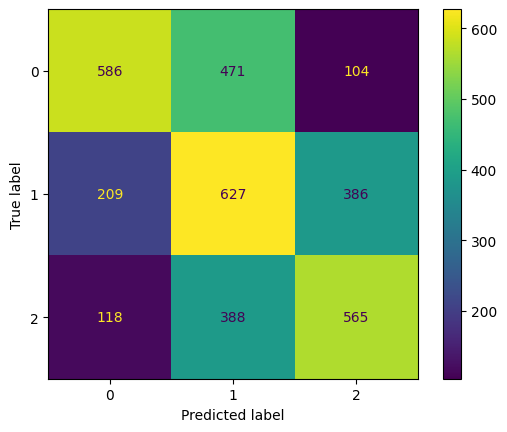

In [26]:
#lets check the accuracy
y_pred_lr = lr.predict(x_test)

print("accuracy score: %f" % accuracy_score(y_test, y_pred_lr))
print("F1-score: %f" % f1_score(y_test, y_pred_lr, average='micro'))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))

plot_confusion_matrix(lr, x_test, y_test)  
plt.show()

We see that the logistic regression model has a lot more difficulty with predicting multiple classes as its F1 score is only 51.48% now

#### Support Vector Machines

Next, lets look at support vector machines. Here, we can use a method called One-vs-One (OVO). Like one-vs-rest, ovo also splits the multiclass problem into multiple binary problems.
- In our case, we will split it into 6 different binary classification problems
    - High vs Medium
    - High vs Low
    - Medium vs Low

This can be easily implemented with the SVC function by setting the multi_class input to 'ovo'



In [27]:
svc = SVC(decision_function_shape='ovo')
svc.fit(x_trainval, y_trainval)

SVC(decision_function_shape='ovo')

accuracy score: 0.530689
F1-score: 0.530689
confusion matrix:
[[659 424  78]
 [252 639 331]
 [131 405 535]]


C:\Users\Yang\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


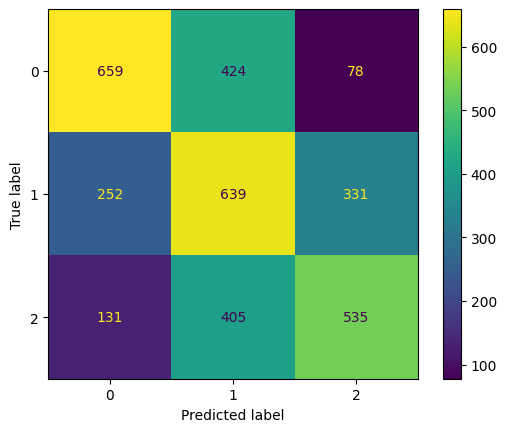

In [28]:
#lets check the accuracy
y_pred_svc = svc.predict(x_test)

print("accuracy score: %f" % accuracy_score(y_test, y_pred_svc))
print("F1-score: %f" % f1_score(y_test, y_pred_svc, average='micro'))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_svc))

plot_confusion_matrix(svc, x_test, y_test)  
plt.show()

We see a slightly better performance than the one-vs-all method used previously, with an F1 score of 53.07%

However, note this method scales in complexity with every new class added so it is not suitable with problems with a large amount of classes

#### Random Forest

Now let’s try a classifier that natively allows multi-class: Random Forest. As discussed in class, this method uses a combination of decision trees and bagging to improve the overall accuracy of the classification.


In [29]:
rf=RandomForestClassifier()
rf.fit(x_trainval, y_trainval)

RandomForestClassifier()

accuracy score: 0.545744
F1-score: 0.545744
confusion matrix:
[[732 327 102]
 [318 550 354]
 [123 345 603]]


C:\Users\Yang\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


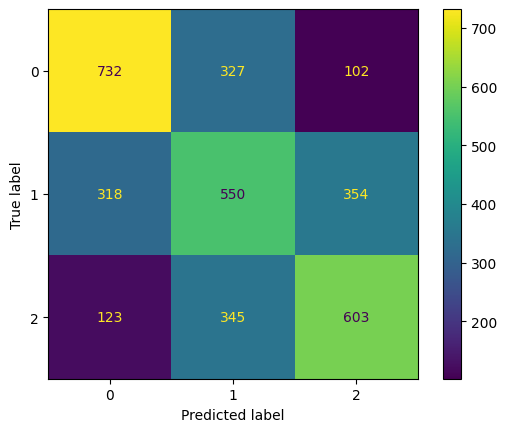

In [30]:
#lets check the accuracy
y_pred_rf = rf.predict(x_test)

print("accuracy score: %f" % accuracy_score(y_test, y_pred_rf))
print("F1-score: %f" % f1_score(y_test, y_pred_rf, average='micro'))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))

plot_confusion_matrix(rf, x_test, y_test)  
plt.show()

Again, we see an improvement in the F1 score: 54.81%

#### XGBooster

Lastly, lets try the XGBooster model again

In [31]:
# training data with the model of XGBooster
model = xgb.XGBClassifier()

#for parameter tuning, prepare parameters
params = { 'learning_rate': [ 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
             'gamma': [ 0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0]}

#making cross-validation and grid search model which uses xgbooster.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params, 
                    cv=skf, scoring='f1_micro', n_jobs=1, verbose=3)
clf.fit(x_trainval, y_trainval)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END gamma=0.0001, learning_rate=0.0001;, score=0.514 total time=   1.2s
[CV 2/5] END gamma=0.0001, learning_rate=0.0001;, score=0.529 total time=   1.3s
[CV 3/5] END gamma=0.0001, learning_rate=0.0001;, score=0.523 total time=   1.3s
[CV 4/5] END gamma=0.0001, learning_rate=0.0001;, score=0.533 total time=   1.3s
[CV 5/5] END gamma=0.0001, learning_rate=0.0001;, score=0.516 total time=   1.4s
[CV 1/5] END .gamma=0.0001, learning_rate=0.001;, score=0.519 total time=   1.5s
[CV 2/5] END .gamma=0.0001, learning_rate=0.001;, score=0.528 total time=   1.4s
[CV 3/5] END .gamma=0.0001, learning_rate=0.001;, score=0.526 total time=   1.3s
[CV 4/5] END .gamma=0.0001, learning_rate=0.001;, score=0.539 total time=   1.4s
[CV 5/5] END .gamma=0.0001, learning_rate=0.001;, score=0.516 total time=   1.4s
[CV 1/5] END ..gamma=0.0001, learning_rate=0.01;, score=0.525 total time=   1.4s
[CV 2/5] END ..gamma=0.0001, learning_rate=0.01

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3,
                                           1.0]},
             scoring='f1_micro', verbose=3)

In [32]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
df = pd.DataFrame(data=zip(means, stds, params), columns=['mean', 'std', 'params'])

# arrange std to low to high
df = df.sort_values('std', ascending=True)
df = df.sort_values('mean', ascending=False)

# show score, std, parameters
for index, row in df.iterrows():
    print("score: %.3f +/-%.4f, params: %r" % 
          (row['mean'], row['std']*2, row['params']))

score: 0.559 +/-0.0183, params: {'gamma': 0.03, 'learning_rate': 0.1}
score: 0.558 +/-0.0128, params: {'gamma': 0.0001, 'learning_rate': 0.1}
score: 0.558 +/-0.0131, params: {'gamma': 0.001, 'learning_rate': 0.1}
score: 0.557 +/-0.0173, params: {'gamma': 0.1, 'learning_rate': 0.1}
score: 0.556 +/-0.0165, params: {'gamma': 1.0, 'learning_rate': 0.3}
score: 0.556 +/-0.0138, params: {'gamma': 1.0, 'learning_rate': 0.1}
score: 0.555 +/-0.0122, params: {'gamma': 0.3, 'learning_rate': 0.1}
score: 0.555 +/-0.0131, params: {'gamma': 0.01, 'learning_rate': 0.1}
score: 0.553 +/-0.0273, params: {'gamma': 0.03, 'learning_rate': 0.3}
score: 0.550 +/-0.0156, params: {'gamma': 0.1, 'learning_rate': 0.3}
score: 0.548 +/-0.0198, params: {'gamma': 1.0, 'learning_rate': 0.03}
score: 0.548 +/-0.0198, params: {'gamma': 0.1, 'learning_rate': 0.03}
score: 0.548 +/-0.0190, params: {'gamma': 0.3, 'learning_rate': 0.03}
score: 0.547 +/-0.0181, params: {'gamma': 0.0001, 'learning_rate': 0.03}
score: 0.547 +/-0.0

In [33]:
y_pred = clf.predict(x_test)
evaluate(y_test, y_pred)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[739 354  68]
 [266 635 321]
 [102 345 624]]
accuracy: 0.5784597568037059
precision: 0.4760119940029985
recall: 0.5196399345335515
f1 score: 0.4968701095461659


Here we see that the F1 score 49.69% while the accuracy is 57.85%. The F1 score is worse than the classifiers used previously but the accuracy is better.

Overall, we see a decrease in the F1 score and accuracy for multi class classification when compared to binary classification. This matches our intuition as it is more difficult to label an item as the total number of labels increases. With binary classification, even if the classifier makes completely random guesses, each prediction still has a 50% chance of being correct, while for multiclass, the probability of correct prediction decreases as for each additional class added.

The best performing model is the random forest classifier with an F1 score of 0.548.

## Section 3: Exploratory Component

We will now investigate the following research questions:

- What are the main factors affecting the price of a rental?
- Can a model trained on data from one city perform well on another city?
- Can data from different cities be pooled to generate better predictions?

### 3.1 What are the main factors affecting the price of a rental?

For this, we can look at the correlation of the parameters to the rental price.

Correlation is a value between -1 and 1 with 0 corresponding to no correlation. A positive value represents a positive correlation, meaning the presence/increase of that attribute would increase the result, while a negative correlation value means the opposite

In [34]:
#What are the main factors affecting the price of a rental?
x_test['y_pred'] = y_pred

cor = x_test.corr()
cor.sort_values('y_pred')['y_pred']

room_type_Private room                    -0.390190
neighbourhood_Bispebjerg                  -0.189801
neighbourhood_Nrrebro                     -0.152666
neighbourhood_Vanlse                      -0.124113
neighbourhood_Valby                       -0.123710
neighbourhood_Amager st                   -0.098573
neighbourhood_Brnshj-Husum                -0.092980
latitude                                  -0.074457
number_of_reviews                         -0.059266
minimum_nights                            -0.026454
room_type_Shared room                     -0.020561
neighbourhood_sterbro                      0.007658
number_of_reviews_ltm                      0.019420
neighbourhood_Frederiksberg                0.022622
room_type_Hotel room                       0.030501
neighbourhood_Vesterbro-Kongens Enghave    0.041315
calculated_host_listings_count             0.186219
longitude                                  0.249245
availability_365                           0.297920
neighbourhoo

From the above correlation table, we see 'private rooms' has the most negative correlation and the neighbourhood 'Indre By' has the most positive correlation. This may be due to private room listings being a room inside the renter's residence. This type of room has less privacy when compared to other options such as 'hotel' or 'entire home/apartment', so it may cause the overall price of the listing to decrease. On the other hand, Indre By is a neighbourhood located in the center of Copenhagen and is one of the most touristy areas of the city, this is likely the cause of high rental prices. 

Availability is another factor. The table shows higher availability is correlated to higher prices. This is likely due to listings being 'over-priced' as the higher the price when compared to similar alternatives, the less likely renters are going to choose the listing.

Additionally, Longitude shows a positive correlation while Latitude has a slightly negative correlation. This is likely the result of the location of the city center of Copenhagen with regards to the rest of the city. While interesting, this information is generally not useful for other cities since they have different geographies.

Overall, the type of room and neighbourhood of the listing has the largest impact on the price. This matches our intuition.

Also note that the absolute value of every parameter is less than 0.5, which means there are no decisive values that determines the price. This means its harder to make an accurate classifier. If we had other parameters which have stronger correlation, this classifier would potentially be much better.

### 3.2 Can a model trained on data from one city perform well on another city?

For this part, we will train our above classification model on the Copenhagen data and then test the model for Amsterdam, Vancouver, London.
We will disregard the neighbourhood variable because the neighbourhoods are not the same across cities

We train our model on the Copenhagen data without the neighbourhood variable.

In [35]:
data_cph = pd.read_csv('listings_CPH.csv')

# threshold = data_cph['price'].mean()
threshold_cph = data_cph['price'].median()
# target
y_test_cph = pd.qcut(data_cph['price'], 3, labels=[0,1,2]).astype(int)

data_cph = data_cph.drop(['id', 'name', 'host_name', 'license', 'neighbourhood_group'], axis=1)

data_cph = data_cph[['latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

data_cph = pd.get_dummies(data_cph, columns=['room_type'], drop_first=True)
data_cph_mean = data_cph.mean(axis=0)
data_cph_std = data_cph.std(axis=0)

col = ['latitude', 'longitude',  'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

#standarzation
for n in col:
    data_cph[n] = (data_cph[n] - data_cph_mean[n]) / data_cph_std[n]

data_cph.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.276988,-0.310200,-0.095004,4.214770,-0.159666,-0.757561,-0.127581,0,0,0
1,0.592800,0.557561,-0.035832,1.110602,-0.159666,1.702615,0.224099,0,0,0
2,-0.215698,0.525035,-0.095004,7.730995,-0.065763,-0.302875,0.136179,0,0,0
3,-0.490256,-0.082517,0.141681,0.149134,-0.159666,-0.278517,-0.303421,0,0,0
4,-0.662307,-0.075263,-0.095004,0.011782,-0.159666,-0.757561,-0.303421,0,0,0


In [36]:
#transforming data into train, validation, test. trainval contains both train and validation data.
x_trainval_2, x_test_2, y_trainval_2, y_test_2 = train_test_split(data_cph, y_test_cph, random_state=0)
x_train_2, x_valid_2, y_train_2, y_valid_2 = train_test_split(x_trainval_2, y_trainval_2, random_state=1)

In [37]:
# We will use the same XGBooster as before
# fit the clf model with the new training data without neighbourhood
clf.fit(x_trainval_2, y_trainval_2)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END gamma=0.0001, learning_rate=0.0001;, score=0.512 total time=   1.3s
[CV 2/5] END gamma=0.0001, learning_rate=0.0001;, score=0.526 total time=   1.2s
[CV 3/5] END gamma=0.0001, learning_rate=0.0001;, score=0.523 total time=   1.3s
[CV 4/5] END gamma=0.0001, learning_rate=0.0001;, score=0.543 total time=   1.2s
[CV 5/5] END gamma=0.0001, learning_rate=0.0001;, score=0.527 total time=   1.3s
[CV 1/5] END .gamma=0.0001, learning_rate=0.001;, score=0.515 total time=   1.2s
[CV 2/5] END .gamma=0.0001, learning_rate=0.001;, score=0.528 total time=   1.3s
[CV 3/5] END .gamma=0.0001, learning_rate=0.001;, score=0.531 total time=   1.2s
[CV 4/5] END .gamma=0.0001, learning_rate=0.001;, score=0.542 total time=   1.2s
[CV 5/5] END .gamma=0.0001, learning_rate=0.001;, score=0.528 total time=   1.3s
[CV 1/5] END ..gamma=0.0001, learning_rate=0.01;, score=0.533 total time=   1.2s
[CV 2/5] END ..gamma=0.0001, learning_rate=0.01

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3,
                                           1.0]},
             scoring='f1_micro', verbose=3)

In [38]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
df = pd.DataFrame(data=zip(means, stds, params), columns=['mean', 'std', 'params'])

# sort std and mean lower to higher
df = df.sort_values('std', ascending=True)
df = df.sort_values('mean', ascending=False)

# show score, std, params
for index, row in df.iterrows():
    print("score: %.3f +/-%.4f, params: %r" % 
          (row['mean'], row['std']*2, row['params']))

score: 0.553 +/-0.0102, params: {'gamma': 0.001, 'learning_rate': 0.1}
score: 0.552 +/-0.0082, params: {'gamma': 0.01, 'learning_rate': 0.1}
score: 0.552 +/-0.0134, params: {'gamma': 0.0001, 'learning_rate': 0.1}
score: 0.552 +/-0.0118, params: {'gamma': 0.1, 'learning_rate': 0.1}
score: 0.551 +/-0.0115, params: {'gamma': 1.0, 'learning_rate': 0.1}
score: 0.551 +/-0.0137, params: {'gamma': 1.0, 'learning_rate': 0.3}
score: 0.550 +/-0.0116, params: {'gamma': 0.03, 'learning_rate': 0.1}
score: 0.549 +/-0.0092, params: {'gamma': 0.3, 'learning_rate': 0.1}
score: 0.547 +/-0.0121, params: {'gamma': 0.0001, 'learning_rate': 0.3}
score: 0.546 +/-0.0167, params: {'gamma': 0.0001, 'learning_rate': 0.03}
score: 0.546 +/-0.0147, params: {'gamma': 0.01, 'learning_rate': 0.03}
score: 0.546 +/-0.0155, params: {'gamma': 0.1, 'learning_rate': 0.03}
score: 0.546 +/-0.0172, params: {'gamma': 0.001, 'learning_rate': 0.03}
score: 0.546 +/-0.0167, params: {'gamma': 1.0, 'learning_rate': 0.03}
score: 0.546 

In [39]:
y_pred_2 = clf.predict(x_test_2)
evaluate(y_test_2, y_pred_2)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[746 348  67]
 [266 622 334]
 [109 347 615]]
accuracy: 0.574116965836711
precision: 0.47228549734244496
recall: 0.5090016366612111
f1 score: 0.4899566758566365


This model gives us an accuracy of 0.57 and an f1 score of 0.49 when testing on the same Copenhagen data.

Now we test our above model on the new Amsterdam listings data.

In [40]:
data_amsterdam = pd.read_csv('listings_amsterdam.csv')

# threshold = data_amsterdam['price'].mean()
threshold_amsterdam = data_amsterdam['price'].median()
# target
# y_test_amsterdam = data_amsterdam['price'].apply(lambda x: x>threshold).astype(int)
y_test_amsterdam = pd.qcut(data_amsterdam['price'], 3, labels=[0,1,2]).astype(int)

data_amsterdam = data_amsterdam.drop(['id', 'name', 'host_name', 'license', 'neighbourhood_group'], axis=1)

data_amsterdam = data_amsterdam[['latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

data_amsterdam = pd.get_dummies(data_amsterdam, columns=['room_type'], drop_first=True)
data_amsterdam_mean = data_amsterdam.mean(axis=0)
data_amsterdam_std = data_amsterdam.std(axis=0)

col = ['latitude', 'longitude',  'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

#standarzation
for n in col:
    data_amsterdam[n] = (data_amsterdam[n] - data_amsterdam_mean[n]) / data_amsterdam_std[n]

data_amsterdam.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.072895,1.223330,-0.056152,2.631328,-0.342809,-0.636732,0.438466,0,1,0
1,-0.085569,0.037335,-0.107663,2.981823,0.022300,-0.757787,-0.379826,0,1,0
2,0.979891,-0.011633,-0.081908,1.868484,-0.342809,0.288479,-0.117973,0,1,0
3,0.080994,-0.034565,-0.081908,3.899297,0.022300,0.253892,2.075050,0,1,0
4,-0.005455,-0.030026,-0.081908,5.486835,0.022300,0.625705,2.435099,0,1,0


In [41]:
y_pred_amsterdam = clf.predict(data_amsterdam)
evaluate(y_test_amsterdam, y_pred_amsterdam)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1202  599  500]
 [ 597  942  788]
 [ 356  856 1053]]
accuracy: 0.4638038589873785
precision: 0.392991239048811
recall: 0.40481306403094114
f1 score: 0.3988145639288739


We get an accuracy of 0.46 and an f1 score of 0.40 which is lower compared to the accuracy (0.57) and f1 score (0.49) which we got when testing the Copenhagen data.

Now we test our above model on the London listings data. 

In [42]:
data_london = pd.read_csv('listings_london.csv')

# threshold = data_london['price'].mean()
threshold_london = data_london['price'].median()
# target
# y_test_london = data_london['price'].apply(lambda x: x>threshold).astype(int)
y_test_london = pd.qcut(data_london['price'], 3, labels=[0,1,2]).astype(int)

data_london = data_london.drop(['id', 'name', 'host_name', 'license', 'neighbourhood_group'], axis=1)

data_london = data_london[['latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

data_london = pd.get_dummies(data_london, columns=['room_type'], drop_first=True)
data_london_mean = data_london.mean(axis=0)
data_london_std = data_london.std(axis=0)

col = ['latitude', 'longitude',  'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

#standarzation
for n in col:
    data_london[n] = (data_london[n] - data_london_mean[n]) / data_london_std[n]

data_london.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.390306,0.738224,-0.116591,1.174513,-0.295770,-0.259900,-0.393471,0,1,0
1,1.200973,0.156394,-0.194384,0.308407,-0.268851,1.765380,0.354503,0,1,0
2,0.385630,0.537149,-0.038799,0.605357,-0.295770,0.854380,-0.310363,0,0,0
3,0.309789,0.234249,-0.077695,11.765750,-0.188095,0.959785,1.268694,0,1,0
4,0.103614,-0.708724,0.311266,-0.285495,-0.295770,0.538166,-0.227254,0,0,0


In [43]:
y_pred_london = clf.predict(data_london)
evaluate(y_test_london, y_pred_london)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[21186  1820  1256]
 [ 8873  6990  6299]
 [ 4274  7439 11214]]
accuracy: 0.5679802742570402
precision: 0.43018031878884855
recall: 0.31540474686400144
f1 score: 0.36395824112884334


We get an accuracy of 0.57 and an f1 score of 0.36 which is also lower compared to the accuracy (0.57) and f1 score (0.49) which we got when testing the Copenhagen data.

Now we test our above model on the Vancouver data listings data.

In [44]:
data_vancouver = pd.read_csv('listings_vancouver.csv')

# threshold = data_vancouver['price'].mean()
threshold_vancouver = data_vancouver['price'].median()
# target
y_test_vancouver = data_vancouver['price'].apply(lambda x: x>threshold).astype(int)
y_test_vancouver = pd.qcut(data_vancouver['price'], 3, labels=[0,1,2]).astype(int)

data_vancouver = data_vancouver.drop(['id', 'name', 'host_name', 'license', 'neighbourhood_group'], axis=1)

data_vancouver = data_vancouver[['latitude', 'longitude', 'room_type',
        'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

data_vancouver = pd.get_dummies(data_vancouver, columns=['room_type'], drop_first=True)
data_vancouver_mean = data_vancouver.mean(axis=0)
data_vancouver_std = data_vancouver.std(axis=0)

col = ['latitude', 'longitude',  'minimum_nights', 'number_of_reviews',
        'calculated_host_listings_count','availability_365', 'number_of_reviews_ltm']

#standarzation
for n in col:
    data_vancouver[n] = (data_vancouver[n] - data_vancouver_mean[n]) / data_vancouver_std[n]

data_vancouver.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.888677,-0.449327,0.407501,5.523340,-0.373371,-0.844237,-0.287336,0,0,0
1,-0.266492,1.022719,0.407501,0.760045,-0.373371,0.487310,-0.441321,0,0,0
2,-0.580032,0.650701,-0.418782,-0.073184,-0.373371,-1.120001,-0.646635,0,0,0
3,0.763261,0.481690,0.407501,3.079200,-0.183966,0.337609,-0.492649,0,0,0
4,0.673679,1.634898,-0.418782,-0.448137,-0.373371,-1.041211,-0.543978,0,0,0


In [45]:
y_pred_vancouver = clf.predict(data_vancouver)
evaluate(y_test_vancouver, y_pred_vancouver)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1077  509  328]
 [ 679  687  437]
 [ 569  858  428]]
accuracy: 0.39339554917444364
precision: 0.33446932814021424
recall: 0.3810316139767055
f1 score: 0.35623541612652326


We get an accuracy of 0.39 and an f1 score of 0.36 which is also lower compared to the accuracy (0.57) and f1 score (0.49) which we got when testing the Copenhagen data..

We used the Copenhagen data to train our model. Then we tested the model on data for Amsterdam, Vancouver, and London. We can conclude that the accuracy and p1 score is lower for the other cities than for Copenhagen.

This is likely due to the neighbourhood having a strong correlation to the price. Without it, it is very difficult to predict the price of the rentals since there are no attributes with strong correlation to the price.

### 3.3 Can data from different cities be pooled to generate better predictions?

We will combine the data from Copenhagen and Amsterdam into one dataset.

In [46]:
# combine cph and amsterdam data
data_combined = pd.DataFrame()
data_combined = data_combined.append(data_cph)
data_combined = data_combined.append(data_amsterdam)

# commbine cph and amsterdam target data
y_test_combined = pd.Series()
y_test_combined = y_test_combined.append(y_test_cph)
y_test_combined = y_test_combined.append(y_test_amsterdam)

C:\Users\Yang\AppData\Local\Temp\ipykernel_43924\2880475220.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_combined = data_combined.append(data_cph)
C:\Users\Yang\AppData\Local\Temp\ipykernel_43924\2880475220.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_combined = data_combined.append(data_amsterdam)
C:\Users\Yang\AppData\Local\Temp\ipykernel_43924\2880475220.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test_combined = pd.Series()
C:\Users\Yang\AppData\Local\Temp\ipykernel_43924\2880475220.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test_combined = y_test_combined.app

Then we fit the model with the new pooled data of Copenhagen and Amsterdam

In [47]:
#transforming data into train, validation, test. trainval contains both train and validation data.
x_trainval_3, x_test_3, y_trainval_3, y_test_3 = train_test_split(data_combined, y_test_combined, random_state=0)
x_train_3, x_valid_3, y_train_3, y_valid_3 = train_test_split(x_trainval_3, y_trainval_3, random_state=1)

#fit the clf model with the new training data
clf.fit(x_trainval_3, y_trainval_3)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END gamma=0.0001, learning_rate=0.0001;, score=0.493 total time=   2.3s
[CV 2/5] END gamma=0.0001, learning_rate=0.0001;, score=0.514 total time=   2.0s
[CV 3/5] END gamma=0.0001, learning_rate=0.0001;, score=0.517 total time=   2.3s
[CV 4/5] END gamma=0.0001, learning_rate=0.0001;, score=0.526 total time=   2.4s
[CV 5/5] END gamma=0.0001, learning_rate=0.0001;, score=0.524 total time=   2.3s
[CV 1/5] END .gamma=0.0001, learning_rate=0.001;, score=0.495 total time=   2.3s
[CV 2/5] END .gamma=0.0001, learning_rate=0.001;, score=0.514 total time=   2.3s
[CV 3/5] END .gamma=0.0001, learning_rate=0.001;, score=0.521 total time=   2.1s
[CV 4/5] END .gamma=0.0001, learning_rate=0.001;, score=0.528 total time=   2.3s
[CV 5/5] END .gamma=0.0001, learning_rate=0.001;, score=0.524 total time=   2.2s
[CV 1/5] END ..gamma=0.0001, learning_rate=0.01;, score=0.510 total time=   2.3s
[CV 2/5] END ..gamma=0.0001, learning_rate=0.01

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3,
                                           1.0]},
             scoring='f1_micro', verbose=3)

In [48]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
df = pd.DataFrame(data=zip(means, stds, params), columns=['mean', 'std', 'params'])

# sort std and mean lower to higher
df = df.sort_values('std', ascending=True)
df = df.sort_values('mean', ascending=False)

# show score, std, params
for index, row in df.iterrows():
    print("score: %.3f +/-%.4f, params: %r" % 
          (row['mean'], row['std']*2, row['params']))

score: 0.561 +/-0.0289, params: {'gamma': 0.1, 'learning_rate': 0.1}
score: 0.558 +/-0.0265, params: {'gamma': 0.3, 'learning_rate': 0.1}
score: 0.558 +/-0.0247, params: {'gamma': 0.001, 'learning_rate': 0.1}
score: 0.558 +/-0.0336, params: {'gamma': 0.03, 'learning_rate': 0.1}
score: 0.557 +/-0.0305, params: {'gamma': 0.01, 'learning_rate': 0.1}
score: 0.557 +/-0.0239, params: {'gamma': 0.0001, 'learning_rate': 0.1}
score: 0.557 +/-0.0233, params: {'gamma': 1.0, 'learning_rate': 0.1}
score: 0.554 +/-0.0254, params: {'gamma': 0.1, 'learning_rate': 0.3}
score: 0.553 +/-0.0274, params: {'gamma': 1.0, 'learning_rate': 0.3}
score: 0.552 +/-0.0303, params: {'gamma': 0.03, 'learning_rate': 0.3}
score: 0.551 +/-0.0248, params: {'gamma': 0.0001, 'learning_rate': 0.3}
score: 0.551 +/-0.0264, params: {'gamma': 0.3, 'learning_rate': 0.3}
score: 0.549 +/-0.0248, params: {'gamma': 0.01, 'learning_rate': 0.3}
score: 0.546 +/-0.0271, params: {'gamma': 0.001, 'learning_rate': 0.3}
score: 0.544 +/-0.03

In [49]:
y_pred_3= clf.predict(x_test_3)
evaluate(y_test_3, y_pred_3)

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1111  545  134]
 [ 378  879  493]
 [ 170  564  903]]
accuracy: 0.5588178481746185
precision: 0.44215291750503016
recall: 0.5022857142857143
f1 score: 0.47030497592295345


In [50]:
# test cph data with pooled training data from CPH+AMS
evaluate(y_test_cph, clf.predict(data_cph))

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[3185 1278  264]
 [ 832 2997  970]
 [ 398 1328 2563]]
accuracy: 0.6330076004343105
precision: 0.5348920221310013
recall: 0.6245051052302563
f1 score: 0.5762353393578159


When testing for the Copenhagen data, the model gives us an accuracy of 0.63 and an f1 score of 0.58 which is higher compared to the accuracy (0.57) and f1 score (0.49) of the model which used only Copenhagen data for training the model.

In [51]:
# test amsterdam data with pooled training data from CPH+AMS
evaluate(y_test_amsterdam, clf.predict(data_amsterdam))

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1587  541  173]
 [ 381 1400  546]
 [ 180  553 1532]]
accuracy: 0.6555926302045554
precision: 0.5613472333600642
recall: 0.6016330038676407
f1 score: 0.5807923667288944


When testing for the Amsterdam data, the model gives us an accuracy of 0.66 and an f1 score of 0.58 which is higher compared to the accuracy (0.57) and f1 score (0.49) of the model which used only Copenhagen data for training the model.

In [52]:
# test vancouver data with pooled training data from CPH+AMS
evaluate(y_test_vancouver, clf.predict(data_vancouver))

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[1345  247  322]
 [ 973  420  410]
 [ 726  550  579]]
accuracy: 0.4206748025843503
precision: 0.3451109285127362
recall: 0.23294509151414308
f1 score: 0.2781456953642384


When testing for the Vancouver data, the model gives us an accuracy of 0.58 and an f1 score of 0.34 which is similar compared to the accuracy (0.57) and f1 score (0.49) of the model which used only Copenhagen data for training the model.

In [53]:
# test london data with pooled training data from CPH+AMS
evaluate(y_test_london, clf.predict(data_london))

Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[22379  1349   534]
 [11579  5858  4725]
 [ 5358  5429 12140]]
accuracy: 0.5822122247696501
precision: 0.46359607470718583
recall: 0.2643263243389586
f1 score: 0.33668601643772633


When testing for the London data, the model gives us an accuracy of 0.58 and an f1 score of 0.34 which is similar compared to the accuracy (0.57) and f1 score (0.49) of the model which used only Copenhagen data for training the model.

*Copenhagen*
- accuracy (only cph training data): 0.57
- f1 score (only cph training data): 0.49
- accuracy (pooled training data): 0.63
- f1 score (pooled training data): 0.58

*Amsterdam*
- accuracy (only cph training data): 0.46
- f1 score (only cph training data): 0.40
- accuracy (pooled training data): 0.66
- f1 score (pooled training data): 0.58

*London*
- accuracy (only cph training data): 0.57
- f1 score (only cph training data): 0.36
- accuracy (pooled training data): 0.58
- f1 score (pooled training data): 0.34

*Vancouver*
- accuracy (only cph training data): 0.39
- f1 score (only cph training data): 0.35
- accuracy (pooled training data): 0.58
- f1 score (pooled training data): 0.34

From the results above we can conclude that using pooled data from different cities together to train the model correlates to having a better accuracy and f1 score for cities in the training set. In our case, we see an increase in both Copenhagen and Amsterdam prediction accuracy and F1 score after pooling. this is likely due to a larger dataset enabling the classifier to have better training.

However, when using classifiers trained on pooled datasets to predict prices of new cities (Vancouver, London), there is only a small increase in the accuracy. The F1 score stays relatively the same.

Looking closer at the F1 score, we see the main problem is having a low recall score. This means there are a lot of false negatives in the prediction. There is often a trade-off between recall and precision as you could not obtain both high accuracy and recall on complex models.

Our model has relatively high precision.

## Section 4: Conclusions

In this project, we first tried to classify and predict the listing prices in Copenhagen. When performing the binary classification, we initially tried a Logistic Regression classifier and obtained a F1 score of 0.678. Next, we used the XGBooster model which is one of the strongest classifiers and obtained a F1 score of 0.727. Moving to the multi class classification, we utilized Logistic Regression in the form of one-vs-rest (ovr), Support Vector Machines in the form of one-vs-one (ovo), and Random Forest. The performance of each method saw a small increase with Random Forest performing the best with an F1 score of 0.548. This is likely due to the Random Forest classifier being natively multiclass, while Logistic Regression and Support Vector Machines required approximations in the form of ovr and ovo. We also used the XGBooster model and obtained a better accuracy of 0.579 and a worse F1 score of 0.497. This overall decrease of F1 score is expected as the prediction becomes increasingly more difficult with each additional class.

Next, we Looked at the main factors affecting the rental price, we found the neighbourhood and room type have the biggest impact. This matches our intuition as the room and location are some of the most important things renters look. This drives up the demand and price of rentals. Housing prices in more central locations also have a huge impact on the price of the property and affect the listing price. Interestingly, our analysis revealed that the availability also has a strong positive correlation to price. This is likely due to less people wanting to rent 'overpriced' listing. Using this insight, Airbnb could use 'availability' over time to determine whether the pricing of the property is 'reasonable'.

We then tried to predict the rental prices in other cities using the Copenhagen model we trained yielded bad results. The f1 scores across these cities were around 0.38 which isn’t much higher than guessing randomly (33% correct). This was because we could not use the 'neighbourhood' property which was the strongest indicator of price since neighbourhoods are unique to each city.

Lastly, we pooled together the data from multiple cities to see if it yielded better prediction results. For the cities that the classifier was trained on, we saw an increase in F1 scores. This is likely due to the larger dataset having more training data. But when predicting new cities, the classifier yielded similar results to before, an F1 score of 0.34. Again, this is only slightly better than guessing randomly.

Overall, the classifier yielded good results when predicting prices in the same cities the model was trained on. However, when trying to predict prices in new cities, the model had bad performance. This is mainly because the strongest indicator of listing price, 'neighbourhood' cannot be used across different cities. If we had access to datasets with universal parameters with stronger correlation to the rental price such as customer reviews, we would expect the trained classifier to have better performance.

## Individual contribution

Section1
- Introduction  : Wataru + Yang
- Data analysis and visualization : Wataru + Yang

Section2
- Binary Classification : Wataru
- Multi Class Classification : Yang

Section3
- The main factors affecting the price of a rental : Wataru
- A model trained on data from one city perform well on another city : Robert
- Data from different cities be pooled to generate better predictions : Robert

Section4
- Conclusion : Yang

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=408133f6-2821-4274-bd62-4d813cfce945' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>